In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### `Checking for class imbalance`
The [2022 Kaggle Survey](https://www.kaggle.com/kaggle-survey-2022) captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our __salaries__ DataFrame, you can see the following proportion of job categories in the Kaggle survey:
<table>
<thead>
<tr>
<th>Job Category</th>
<th>Relative Frequency</th>
</tr>
</thead>
<tbody>
<tr>
<td>Data Science</td>
<td>0.281236</td>
</tr>
<tr>
<td>Data Analytics</td>
<td>0.224231</td>
</tr>
<tr>
<td>Other</td>
<td>0.214609</td>
</tr>
<tr>
<td>Managerial</td>
<td>0.121300</td>
</tr>
<tr>
<td>Machine Learning</td>
<td>0.083248</td>
</tr>
<tr>
<td>Data Engineering</td>
<td>0.075375</td>
</tr>
</tbody>
</table>


Thinking of the Kaggle survey results as the population, your task is to find out whether the __salaries__ DataFrame is representative by comparing the relative frequency of job categories.

In [3]:
salaries = pd.read_excel('../datasets/2022_Kaggle_Survey.xlsx')
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Machine Learning Scientist,SE,FT,20690000,JP,JP,S,0,248256.840,Machine Learning
1,2020,Big Data Engineer,SE,FT,8675000,GB,GB,M,50,104099.820,Data Engineering
2,2020,Product Data Analyst,MI,FT,1591000,HN,HN,S,0,19096.680,Data Analytics
3,2020,Machine Learning Engineer,SE,FT,11940000,US,US,L,50,143225.100,Machine Learning
4,2020,Data Analyst,EN,FT,5729000,US,US,L,100,68748.048,Data Analytics


- Print the _relative frequency_ of the "__Job_Category__" column from __salaries__ DataFrame.

In [4]:
# Print the relative frequency of Job_Category
print(salaries['Job_Category'].value_counts())

Job_Category
Data Science        17
Data Engineering    12
Data Analytics      10
Machine Learning     6
Managerial           2
Other                1
Name: count, dtype: int64


In [5]:
# Print the relative frequency of Job_Category
print(salaries['Job_Category'].value_counts(normalize=True))

Job_Category
Data Science        0.354167
Data Engineering    0.250000
Data Analytics      0.208333
Machine Learning    0.125000
Managerial          0.041667
Other               0.020833
Name: proportion, dtype: float64


` Data Science is the most popular class and has a similar representation. Still, the other categories have quite different relative frequencies, which might not be surprising given the target audience is data scientists! Given the difference in relative frequencies, can you trust the salaries DataFrame to accurately represent Managerial roles?`

#### `Cross-tabulation`
Cross-tabulation can help identify how observations occur in combination.

Using the __salaries__ dataset, which has been imported as a pandas DataFrame, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between "__Company_Size__" and other variables.

pandas has been imported for you as pd.

In [6]:
salaries.shape

(49, 11)

In [7]:
salaries['Experience'].value_counts()

Experience
MI    20
SE    14
EN    12
EX     3
Name: count, dtype: int64

In [8]:
salaries['Company_Size'].value_counts()

Company_Size
L    24
S    15
M    10
Name: count, dtype: int64

- Perform cross-tabulation, setting "__Company_Size__" as the index, and the columns to classes in "__Experience__".

In [9]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    EN  EX  MI  SE
Company_Size                
L              6   3  11   4
M              1   0   6   3
S              5   0   3   7


- Cross-tabulate "__Job_Category__" and classes of "__Company_Size__" as column names.

In [10]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size      L  M  S
Job_Category             
Data Analytics    8  1  1
Data Engineering  6  2  4
Data Science      6  4  7
Machine Learning  3  0  3
Managerial        1  1  0
Other             0  1  0


- Update __pd.crosstab()__ to return the mean "__Salary_USD__" values.

In [11]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
                  values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size               L           M              S
Job_Category                                           
Data Analytics     91515.948   93573.732   19096.680000
Data Engineering   72383.420  114496.056   75013.434000
Data Science       77125.764   87200.931   80449.810286
Machine Learning  164582.828         NaN  141193.848000
Managerial        224385.996  181609.428            NaN
Other                    NaN  429675.300            NaN


#### `Readable`

In [12]:
import locale

readable = pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
                  values=salaries["Salary_USD"], aggfunc="mean")
# Set locale to display currency correctly
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
readable.applymap(lambda x: locale.currency(x, grouping=True))

C:\Users\Albert\AppData\Local\Temp\ipykernel_2152\1203715573.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  readable.applymap(lambda x: locale.currency(x, grouping=True))


Company_Size,L,M,S
Job_Category,,,
Data Analytics,"$91,515.95","$93,573.73","$19,096.68"
Data Engineering,"$72,383.42","$114,496.06","$75,013.43"
Data Science,"$77,125.76","$87,200.93","$80,449.81"
Machine Learning,"$164,582.83",$nan,"$141,193.85"
Managerial,"$224,386.00","$181,609.43",$nan
Other,$nan,"$429,675.30",$nan


`This is a handy function to examine the combination of frequencies, as well as find aggregated statistics. Looks like the largest mean salary is for Managerial data roles in large companies!`

In [13]:
salaries2 = pd.read_excel('../datasets/salaries2.xlsx')
salaries2.dtypes

Designation                     object
date_of_response        datetime64[ns]
Experience                      object
Employment_Status               object
Salary_In_Rupees               float64
Employee_Location               object
Company_Location                object
Company_Size                    object
Remote_Working_Ratio           float64
Salary_USD                     float64
dtype: object

In [14]:
salaries['date_of_response'] = salaries2['date_of_response']

#### `Extracting features for correlation`
In this exercise, you'll work with a version of the __salaries__ dataset containing a new column called "__date_of_response__".

The dataset has been read in as a pandas DataFrame, with "__date_of_response__" as a __datetime__ data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

Seaborn has been imported for you as sns, pandas as pd, and matplotlib.pyplot as plt.

- Extract the month from "__date_of_response__", storing it as a column called "__month__".
- Create the "__weekday__" column, containing the weekday that the participants completed the survey.
- Plot a heat map, including the Pearson correlation coefficient scores.

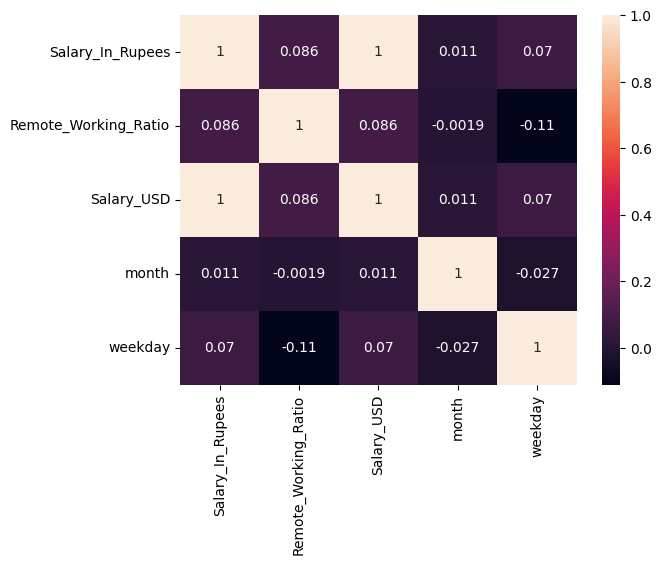

In [15]:
#  Get the month of the response
salaries2["month"] = salaries2['date_of_response'].dt.month

#  Extract the weekday of the response
salaries2["weekday"] = salaries2['date_of_response'].dt.weekday

# Create a heatmap
anjay = salaries2[['Salary_In_Rupees', 'Remote_Working_Ratio',
                  'Salary_USD', 'month', 'weekday']]
sns.heatmap(anjay.corr(), annot=True)
plt.show()

##### ` Looks like there aren't any meaningful relationships between our numeric variables, so let's see if converting numeric data into classes offers additional insights.`

#### `Calculating salary percentiles`
In the video, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the "__Salary_USD__" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.

pandas has been imported as pd and the salaries dataset read in as DataFrame called salaries.

- Find the ___25th___ percentile of "__Salary_USD__".
- Store the ___median___ of "__Salary_USD__" as __salaries_median__.
- Get the __75th__ percentile of __salaries__.

In [16]:
# Find the 25th percentile
twenty_fifth = salaries2['Salary_USD'].quantile(0.25)

# Save the median
salaries_median = salaries2['Salary_USD'].median()

# Gather the 75th percentile
seventy_fifth = salaries2['Salary_USD'].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

60880.691999999995 97488.552 143225.1


##### `Looks like the interquartile range is between 60,881 and 143,225 dollars! Now let's use these variables to add a categorical salary column into the DataFrame!`

#### `Categorizing salaries`
Now it's time to make a new category! You'll use the variables __twenty_fifth__, __salaries_median__, and __seventy_fifth__, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called "__salary_level__", which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

pandas has been imported as pd, matplotlib.pyplot as plt, seaborn as sns, and the salaries dataset as a pandas DataFrame called salaries.

- Create __salary_labels__, a list containing "__entry__", "__mid__", "__senior__", and "__exec__".

In [17]:
salary_labels = ['entry', 'mid', 'senior', 'exec']

- Finish __salary_ranges__, adding the ___25th___ percentile, median, __75th__ percentile, and largest value from "__Salary_USD__".

In [18]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median,
                 seventy_fifth, salaries["Salary_USD"].max()]

- Split "__Salary_USD__" based on the labels and ranges you've created.

In [19]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median,
                 seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

- Use __sns.countplot()__ to visualize the count of "__Company_Size__", factoring salary level labels.


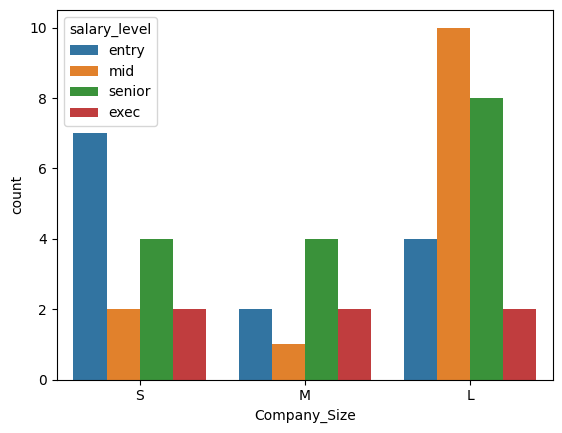

In [20]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median,
                 seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

##### `By using pd.cut() to split out numeric data into categories, you can see that a large proportion of workers at small companies get paid "entry" level salaries, while more staff at medium-sized companies are rewarded with "senior" level salary. Now let's look at generating hypotheses as you reach the end of the EDA phase!`

`Generating Numeric Feature`s: You transformed the 'Total_Stops' column from a string to an integer to reveal its strong correlation with 'Price' and 'Duration'. This involved removing string characters and converting non-numeric values to integers using the string.replace() method.

`Extracting DateTime Attributes`: By converting 'Date_of_Journey', 'Dep_Time', and 'Arrival_Time' into datetime objects, you extracted useful attributes like month and weekday. This helped in investigating if flight prices vary by month or day of the week. For example:

__df["month"] = df["Date_of_Journey"].dt.month df["weekday"] = df["Date_of_Journey"].dt.weekday__

`Visualizing Correlations`: You used seaborn to create heatmaps, visualizing the correlation between newly created features and existing variables. This step was crucial in identifying or dismissing potential relationships.

`Categorizing Data`: You learned to categorize numeric data into classes, such as dividing flight prices into 'Economy', 'Premium Economy', 'Business Class', and 'First Class' based on quartiles. This involved using pandas' quantile and cut functions to create a new 'Price_Category' feature.

`Practical Application`: Finally, you applied these techniques to a salaries dataset, extracting datetime features and categorizing salaries into percentile-based groups to facilitate pattern recognition and analysis.

These skills are vital for deepening your understanding of datasets and preparing them for more sophisticated analyses or machine learning models.

#### `Comparing salaries`
Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by "__Employee_Location__" and produce a plot displaying the average salary between the two groups.

The __salaries__ DataFrame has been imported as a pandas DataFrame.

pandas has been imported as pd, maplotlib.pyplot as plt and seaborn as sns.

- Filter salaries where "__Employee_Location__" is "___US___" or "___GB___", saving as __usa_and_gb__.
- Use __usa_and_gb__ to create a barplot visualizing "__Salary_USD__" against "__Employee_Location__".

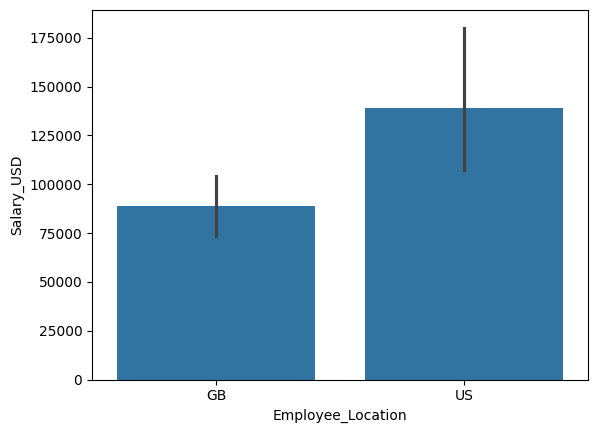

In [21]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

##### ` By subsetting the data you were able to directly compare salaries between the USA and Great Britain. The visualization suggests you've generated a hypothesis that is worth formally investigating to determine whether a real difference exists or not!`

#### `Choosing a hypothesis`
You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!

In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values:
<div class="listview__content"><div class="css-ikv0qb"><h1 class="css-fsa3o0">Choosing a hypothesis</h1><div class="css-alxior"><div class=""><p>You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!</p>
<p>In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values:</p>
<table>
<thead>
<tr>
<th>Value</th>
<th>Meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>CT</code></td>
<td>Contractor</td>
</tr>
<tr>
<td><code>FL</code></td>
<td>Freelance</td>
</tr>
<tr>
<td><code>PT</code></td>
<td>Part-time</td>
</tr>
<tr>
<td><code>FT</code></td>
<td>Full-time</td>
</tr>
</tbody>
</table>
<p><code>pandas</code> has been imported as <code>pd</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, <code>seaborn</code> as <code>sns</code>, and the salaries dataset as a pandas DataFrame called <code>salaries</code>.</p></div></div></div></div>

pandas has been imported as pd, matplotlib.pyplot as plt, seaborn as sns, and the salaries dataset as a pandas DataFrame called salaries.

- Produce a barplot comparing "__Salary_USD__" by "__Company_Size__", factoring "__Employment_Status__".

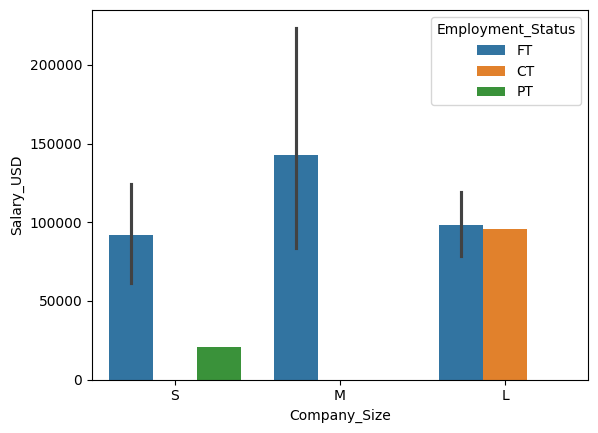

In [22]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size",
            y="Salary_USD", hue="Employment_Status")
plt.show()

#### `Question`
What is a reasonable hypothesis to generate based on this plot?

#### `Possible answers`


- On average, small companies pay part-time employees less than large companies.
- Freelancers earn more at medium-sized companies compared to small or large companies.
- `On average, large companies pay contractors more than medium-sized companies.`
- No hypotheses can be generated from this plot.

##### `Contractors appear to be paid more by large companies on average based on the data, so this is a reasonable hypothesis! Let's recap what you've learned in the course!`